In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('fivethirtyeight')
%matplotlib inline

#model building
#import scipy.stats as ss
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')
train=pd.read_csv('/kaggle/input/titanic/train.csv')
combined = [train, test]

alldata=pd.concat(combined, sort=True).reset_index(drop=True) #Join the dfs vertically.survived column of test is currently filled w NaNs
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **1.EXPLORATORY ANALYSIS**

**Categorical features**   
Categorical: Survived, Sex, and Embarked.   
Ordinal: Pclass.  

**Numerical Features**  
Continous: Age, Fare.   
Discrete: SibSp, Parch.  

###### **Survived** is the target variable we are trying to predict (0 or 1):   
1 = Survived  
0 = Not Survived    
  
**Pclass** (Passenger Class) is the socio-economic status of the passenger which has 3 unique values (1, 2 or 3):  
1 = Upper Class  
2 = Middle Class  
3 = Lower Class   
  
**Embarked** is port of embarkation which has 3 unique values (C, Q or S):  
C = Cherbourg  
Q = Queenstown  
S = Southampton  
  
**SibSp** is the total number of the passengers' siblings and spouse (0 to 8)    
  
**Parch** is the total number of the passengers' parents and children (0 to 6)    

In [4]:
print(train.shape)
print(test.shape) #does not have survived column. we are to predict that!
print(alldata.shape)

(891, 12)
(418, 11)
(1309, 12)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **Overall Visualizations of Feature vs. Target** ##

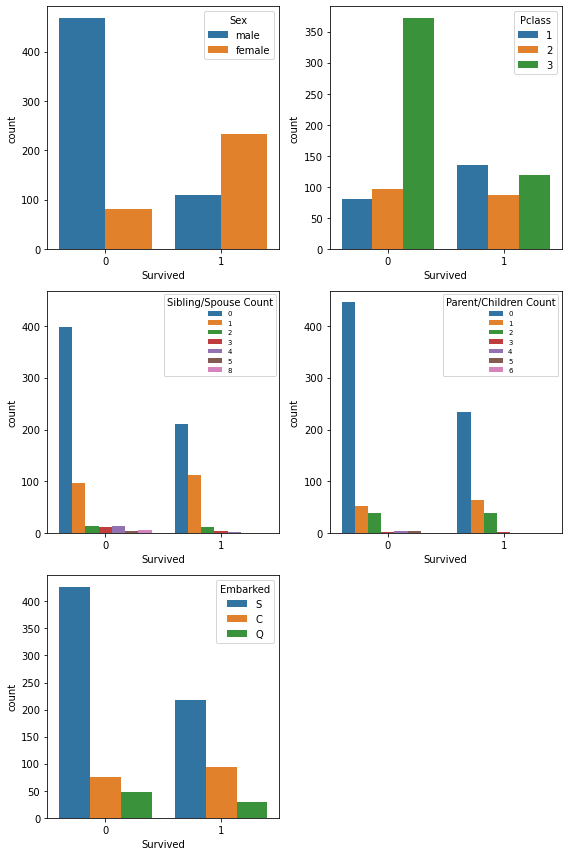

In [6]:
fig=plt.figure()
ax1=plt.subplot(321)
sns.countplot(x = 'Survived', hue = 'Sex', data = train, ax=ax1)

ax2=plt.subplot(322)
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, ax=ax2)

ax3=plt.subplot(323)
sns.countplot(x = 'Survived', hue = 'SibSp', data = train, ax=ax3)
ax3.legend(loc=1, title='Sibling/Spouse Count', fontsize='x-small')

ax4=plt.subplot(324, sharey=ax3)
sns.countplot(x = 'Survived', hue = 'Parch', data = train, ax=ax4)
ax4.legend(loc=1, title='Parent/Children Count', fontsize='x-small')

ax5=plt.subplot(325)
sns.countplot(x = 'Survived', hue = 'Embarked', data = train, ax=ax5)
ax5.legend(loc=1, title='Embarked')

#ax6=plt.subplot(326)
#sns.countplot(x = 'Survived', hue = 'Cabin', data = train, ax=ax6)
#ax6.legend(loc=1, title='Cabin')

fig.set_size_inches(8,12)
fig.tight_layout()

In [7]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


From above table we can see clearly passengers with higher class are prioritized during the evacuation process.

In [8]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

Women also have higher overall survival rate than men.

## **1.1. Missing Values** ##

In [9]:
#checking missing values
print('Training Set\n')
print(train.isnull().sum())
print('-'*40)
print('Test Set\n')
print(test.isnull().sum())

Training Set

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
Test Set

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Lets first focus on the missing values in Age feature.

In [10]:
#correlation matrix for all features.
corr_matr=(alldata.drop('PassengerId', axis=1).corr().abs().unstack().reset_index().rename(columns={'level_0':'Feature 1','level_1':'Feature 2', 0:'corr'})
.sort_values(by=['Feature 1','corr'], ascending=[True,False]))
corr_matr

,Feature 1,Feature 2,corr
0,Age,Age,1.000000
3,Age,Pclass,0.408106
4,Age,SibSp,0.243699
1,Age,Fare,0.178740
2,Age,Parch,0.150917
5,Age,Survived,0.077221
7,Fare,Fare,1.000000
9,Fare,Pclass,0.558629
11,Fare,Survived,0.257307
8,Fare,Parch,0.221539


One can observe Age is highly correlated with Pclass, also Pclass itself is highly correlated with Survived. Therefore, it would not be a bad interpretation if we fill the NaN values of Age, with the median values, according to their classes, sexes and also their port of embarkation.

In [11]:
#number of null records to fill in age column
alldata.groupby(['Sex','Embarked', 'Pclass']).size()-alldata.groupby(['Sex', 'Embarked', 'Pclass'])['Age'].count()

Sex     Embarked  Pclass
female  C         1          6
                  2          0
                  3          9
        Q         1          0
                  2          1
                  3         35
        S         1          5
                  2          2
                  3         20
male    C         1          7
                  2          4
                  3         32
        Q         1          0
                  2          1
                  3         36
        S         1         21
                  2          8
                  3         76
dtype: int64

In [12]:
alldata['Age'] = alldata.groupby(['Sex', 'Embarked', 'Pclass'])['Age'].apply( lambda x: x.fillna(x.median()) )
alldata.isnull().sum()

Age               2
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [13]:
#2 missing age records are because of the missing embarked records. fill those with median values, excluding their embarked feature.
alldata['Age'] = alldata.groupby(['Sex', 'Pclass'])['Age'].apply( lambda x: x.fillna(x.median()) )
alldata.isnull().sum()

Age               0
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

Lets look into Embarked now.   


In [14]:
alldata[alldata.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,35.5,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,35.5,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


Thanks to *Güneş Evitan*'s efforts here: https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial#1.-Exploratory-Data-Analysis 

> When I googled Stone, Mrs. George Nelson (Martha Evelyn), I found that she embarked from S (Southampton) with her maid Amelie Icard, in this page Martha Evelyn Stone: Titanic Survivor.

We know that two missing values are actually S. Lets fill those.

In [15]:
alldata.Embarked=alldata.Embarked.fillna('S')
alldata.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

Lets fill the single missing value of fare.

In [16]:
alldata[alldata.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


When we check the correlation matrix we can see that Fare is related with Pclass and Parch. So lets fill that missing value with the median fare of corresponding class and parch value.

In [17]:
alldata.Fare=alldata.Fare.fillna(alldata.groupby(['Pclass', 'Parch']).median().Fare[3][0])
alldata.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

We only have left Cabin feature to fill. Now, it should not be as easy as filling the missing values with statistical summarizations, since larger portion of Cabin records are missing.
One way to handle missing data is to add additional category for missing records. (This feature is from [Güneş Evitan's kernel](https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial#1.-Exploratory-Data-Analysis))

In [18]:
#First letter indicates the deck.
alldata['Deck']=alldata.Cabin.str.extract('([A-Za-z]+)', expand=False)
alldata['Deck']=alldata['Deck'].fillna('M') #M:missing

In [19]:
df=alldata.groupby(['Deck', 'Pclass']).agg(Count=pd.NamedAgg(column='Name', aggfunc='count'), Survived=pd.NamedAgg('Survived', sum))
df_decks=pd.DataFrame(df.groupby(level=0).apply(lambda df: df.xs(df.name).Count.to_dict()).to_dict())
df_decks=df_decks.fillna(0)  
print(df)
df_decks

             Count  Survived
Deck Pclass                 
A    1          22       7.0
B    1          65      35.0
C    1          94      35.0
D    1          40      22.0
     2           6       3.0
E    1          34      18.0
     2           4       3.0
     3           3       3.0
F    2          13       7.0
     3           8       1.0
G    3           5       2.0
M    1          67      19.0
     2         254      74.0
     3         693     113.0
T    1           1       0.0


,A,B,C,D,E,F,G,M,T
1,22.0,65.0,94.0,40.0,34,0.0,0.0,67,1.0
2,0.0,0.0,0.0,6.0,4,13.0,0.0,254,0.0
3,0.0,0.0,0.0,0.0,3,8.0,5.0,693,0.0


In [20]:
# Creating a dictionary for percentage of pessengers for each pclass and deck
deck_percentages={}
for col in df_decks.columns:
    deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
deck_percentages=pd.DataFrame(deck_percentages)     
deck_percentages

,A,B,C,D,E,F,G,M,T
0,100.0,100.0,100.0,86.956522,82.926829,0.000000,0.0,6.607495,100.0
1,0.0,0.0,0.0,13.043478,9.756098,61.904762,0.0,25.049310,0.0
2,0.0,0.0,0.0,0.000000,7.317073,38.095238,100.0,68.343195,0.0


Text(0.5, 1.0, 'Passenger class percentage per deck')

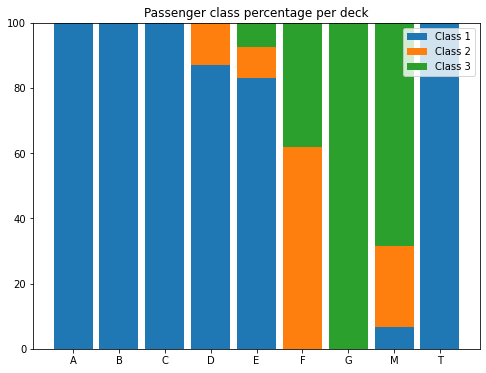

In [21]:
deck_names = deck_percentages.columns.tolist()
bar_count = np.arange(len(deck_names))  

plt.figure(figsize=(8,6))
plt.bar(bar_count, deck_percentages.iloc[0], width=0.85, label='Class 1')
plt.bar(bar_count, deck_percentages.iloc[1], bottom=deck_percentages.iloc[0], width=0.85, label='Class 2')
plt.bar(bar_count, deck_percentages.iloc[2], bottom=deck_percentages.iloc[0]+deck_percentages.iloc[1],width=0.85, label='Class 3')
plt.xticks(bar_count, deck_names)  
plt.legend()
plt.title('Passenger class percentage per deck')

From above table we can observe that:  
* decks A,B,C and T(1 passenger) only used by pclass=1  
* D,E,F,G used by 2 or more pclass categories.  

In [22]:
alldata.loc[alldata.Deck=='T','Deck']='A'
alldata['Deck'] = alldata['Deck'].replace(['A', 'B', 'C'], 'ABC')
alldata['Deck'] = alldata['Deck'].replace(['D', 'E'], 'DE')
alldata['Deck'] = alldata['Deck'].replace(['F', 'G'], 'FG')

alldata['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [23]:
#we will use deck from now on
alldata=alldata.drop('Cabin', axis=1)

In [24]:
#update train and test dfs
train=alldata.loc[:890]
test=alldata.loc[891:].drop('Survived', axis=1)
combined = [train, test]

## **1.2. Correlations** ##

In [25]:
train_corr=(train.drop('PassengerId', axis=1).corr().abs().unstack().reset_index()
            .rename(columns={'level_0':'Feature 1','level_1':'Feature 2', 0:'corr'})
            .sort_values(by=['Feature 1','corr'], ascending=[True,False]))
train_corr=train_corr.query('corr!=1').drop([6,12,13,18,19,24,25,26,31,33])
train_corr=train_corr.query('corr>0.1').sort_values(by='corr', ascending=False)

In [26]:
test_corr=(test.drop('PassengerId', axis=1).corr().abs().unstack().reset_index()
            .rename(columns={'level_0':'Feature 1','level_1':'Feature 2', 0:'corr'})
            .sort_values(by=['Feature 1','corr'], ascending=[True,False]))
test_corr=test_corr.query('corr!=1').reset_index(drop=True).drop([5,10,13,18, 9,12,17, 14,16])
test_corr=test_corr.query('corr>=0.1').sort_values(by='corr', ascending=False)

In [27]:
#NaNs correlations actually correspond to correlations that are smaller than 0.1
corr=pd.merge(train_corr, test_corr, on=['Feature 1', 'Feature 2'], how='outer', suffixes=['_train', '_test'])
corr

,Feature 1,Feature 2,corr_train,corr_test
0,Fare,Pclass,0.549500,0.577488
1,Age,Pclass,0.416355,0.526966
2,Parch,SibSp,0.414838,0.306895
3,Pclass,Survived,0.338481,NaN
4,Fare,Survived,0.257307,NaN
5,Age,SibSp,0.247391,NaN
6,Fare,Parch,0.216225,0.230409
7,Age,Parch,0.176516,NaN
8,Fare,SibSp,0.159651,0.172031
9,Age,Fare,0.123582,0.341935


* Heatmap

Text(0.5, 1.0, 'Correlation matrix for test set')

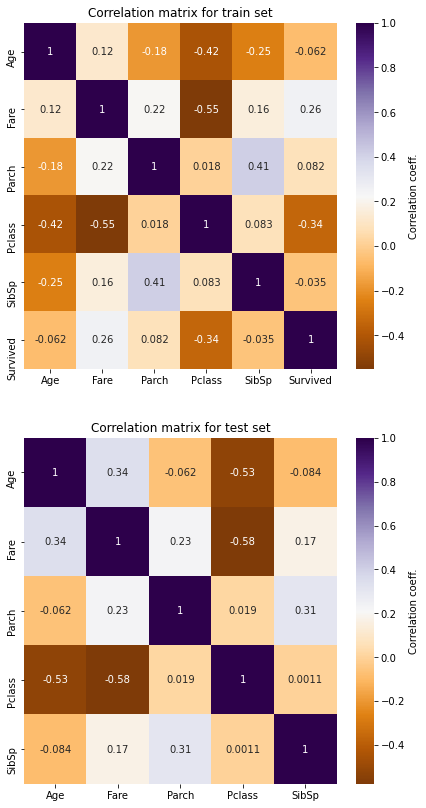

In [28]:
fig, axs=plt.subplots(2,1, figsize=(7,14))
sns.heatmap(train.drop('PassengerId', axis=1).corr(), ax=axs[0], annot=True, cbar_kws={'label': 'Correlation coeff.'}, cmap="PuOr")
sns.heatmap(test.drop('PassengerId', axis=1).corr(),  ax=axs[1], annot=True, cbar_kws={'label': 'Correlation coeff.'}, cmap="PuOr")
axs[0].set_title('Correlation matrix for train set')
axs[1].set_title('Correlation matrix for test set')



# **2. FEATURE ENGINEERING**

## **2.1. Title Feature (extracted from Name)**

In [29]:
alldata['Title']=alldata.Name.str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.replace(" ","")

In [30]:
alldata.Title.value_counts() #title value counts

Mr             757
Miss           260
Mrs            197
Master          61
Rev              8
Dr               8
Col              4
Major            2
Ms               2
Mlle             2
Jonkheer         1
Capt             1
Sir              1
Dona             1
Don              1
theCountess      1
Lady             1
Mme              1
Name: Title, dtype: int64

We are going to group the titles that occured rarely under Rare group.

In [31]:
alldata['Title'] = alldata['Title'].replace(['Lady', 'theCountess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
alldata['Title'] = alldata['Title'].replace('Mlle', 'Miss')
alldata['Title'] = alldata['Title'].replace('Ms', 'Miss')
alldata['Title'] = alldata['Title'].replace('Mme', 'Mrs')

alldata['Title'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: Title, dtype: int64

In [32]:
print (alldata[['Title', 'Survived']].groupby(['Title']).mean())

        Survived
Title           
Master  0.575000
Miss    0.702703
Mr      0.156673
Mrs     0.793651
Rare    0.347826


## 2.2. FamilySize (from SibSp and Parch) 

In [33]:
alldata['FamilySize']=alldata['SibSp']+alldata['Parch']+1

In [34]:
alldata.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Title,FamilySize
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M,Mr,2
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,ABC,Mrs,2
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M,Miss,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,ABC,Mrs,2
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M,Mr,1


In [35]:
alldata.loc[:,'IsAlone']=alldata.FamilySize==1
alldata['IsAlone']=alldata['IsAlone']*1

## 2.3. Family

Inspired by [S.Xu's kernel](https://www.kaggle.com/shunjiangxu/blood-is-thicker-than-water-friendship-forever#Extracting-family-information)

In [36]:
alldata['Surname']=alldata.Name.apply(lambda x: str.split(x, ",")[0])
surnames=alldata.Surname.value_counts()
surnames

Sage           11
Andersson      11
Asplund         8
Goodwin         8
Davies          7
               ..
Brocklebank     1
Pulbaum         1
Christmann      1
McEvoy          1
O'Driscoll      1
Name: Surname, Length: 875, dtype: int64

In [37]:
surnames.value_counts()

1     637
2     133
3      63
4      22
6       9
5       6
11      2
8       2
7       1
Name: Surname, dtype: int64

When we dig into the data, we can observe that we have:
* 637 passengers travelling alone
* 133 families with size 2
* 63 families with size 3
* 22 families with size 4
* 6 families with size 5
* 9 families with size 6
* 1 families with size 7
* 2 families with size 8
* 2 families with size 11

Since different families might have the same surname, we need one more feature in order not to miss out on that probability. Lets check if tickets and fare has anything to do with surnames.

In [38]:
for i in range(2,12):
    print( 'Number of groups consists of {} people, with the same ticket number: {} '.format( i, (alldata['Ticket'].value_counts()==i).sum()) )

Number of groups consists of 2 people, with the same ticket number: 132 
Number of groups consists of 3 people, with the same ticket number: 49 
Number of groups consists of 4 people, with the same ticket number: 16 
Number of groups consists of 5 people, with the same ticket number: 7 
Number of groups consists of 6 people, with the same ticket number: 4 
Number of groups consists of 7 people, with the same ticket number: 5 
Number of groups consists of 8 people, with the same ticket number: 2 
Number of groups consists of 9 people, with the same ticket number: 0 
Number of groups consists of 10 people, with the same ticket number: 0 
Number of groups consists of 11 people, with the same ticket number: 1 


In [39]:
fare_counts=alldata['Fare'].value_counts().value_counts().reset_index().sort_values(by='index').rename(columns={'index':'consists_of'})
for i in fare_counts['consists_of']:
    print( 'Number of groups consists of {} people, with the same fare: {} '.format(i, fare_counts.loc[fare_counts.consists_of==i,'Fare'].values[0]) )


Number of groups consists of 1 people, with the same fare: 77 
Number of groups consists of 2 people, with the same fare: 74 
Number of groups consists of 3 people, with the same fare: 43 
Number of groups consists of 4 people, with the same fare: 23 
Number of groups consists of 5 people, with the same fare: 11 
Number of groups consists of 6 people, with the same fare: 11 
Number of groups consists of 7 people, with the same fare: 10 
Number of groups consists of 8 people, with the same fare: 4 
Number of groups consists of 9 people, with the same fare: 3 
Number of groups consists of 10 people, with the same fare: 4 
Number of groups consists of 11 people, with the same fare: 3 
Number of groups consists of 12 people, with the same fare: 2 
Number of groups consists of 14 people, with the same fare: 1 
Number of groups consists of 17 people, with the same fare: 1 
Number of groups consists of 18 people, with the same fare: 1 
Number of groups consists of 21 people, with the same far

Now we know that certain people have the same fare and/or ticket number. We also know it is correlated with surname feature. But above information is not enough for us to decide whether to use Ticket or Fare for grouping of families.  
If we group the data by Surname and Familysize and check for number of unique values in Fare/Ticket column, we should see mostly 1's since every record with unique surname and family size should represent the family, according to our current assumption.   
Feature with the least number of unique values per group will be chosen.    


In [40]:
df_fare=alldata.loc[alldata['FamilySize']>1, ["Surname","Fare", "FamilySize"]].iloc[:len(train)]
(df_fare.sort_values(by='Surname', ascending=True).groupby(['Surname', 'FamilySize']).nunique().Fare!=1).sum()/len(train)*100

1.6835016835016834

In [41]:
df_ticket=alldata.loc[alldata['FamilySize']>1, ["Surname","Ticket", "FamilySize"]].iloc[:len(train)]
(df_ticket.sort_values(by='Surname', ascending=True).groupby(['Surname', 'FamilySize']).nunique().Ticket!=1).sum()/len(train)*100

2.8058361391694726

**Ticket:** 2.80% of records has a different ticket value between family members. This is expected, since currently we know this grouping of families is not %100 true because we do not take into account the families with the same surname.    
**Fare:** 1.68% of records has a different fare value between family members.  
We will chose Fare. 

From [S.Xu's kernel](https://www.kaggle.com/shunjiangxu/blood-is-thicker-than-water-friendship-forever#Extracting-family-information), we already know that majority of families are either all survived or all perished. This means, we can create a Family_Survival feature to predict survival of the passenger. We will pass it 1 if any one of the family members are survived, 0 otherwise.

In [42]:
alldata['Family_Survival']=0.5 #initial survival value. We gonna change this in a bit.
for groupname, group_df in alldata.groupby(['Surname', 'Fare']):
    if len(group_df)!=1: #we found ourselves a family!
        for idx, row in group_df.iterrows():
            smax=group_df.drop(idx).Survived.max()
            smin=group_df.drop(idx).Survived.min()
            passid=row['PassengerId']
            if (smax == 1.0):
                alldata.loc[alldata['PassengerId'] == passid, 'Family_Survival'] = 1
            elif (smin==0.0):
                alldata.loc[alldata['PassengerId'] == passid, 'Family_Survival'] = 0
                
print("Number of passengers with family survival information:", 
      alldata.loc[alldata['Family_Survival']!=0.5].shape[0])
print("Number of passengers without family survival information:", 
      alldata.loc[alldata['Family_Survival']==0.5].shape[0])

Number of passengers with family survival information: 420
Number of passengers without family survival information: 889


High number of passengers without family survival information is expectable since there are already 637 passengers travelling alone.
Remember the Tickets feature that we dropped over Fare? Maybe that would help us identify the relationship among people without family survival information.

In [43]:
ticket_grpby = alldata.iloc[:len(train)].groupby('Ticket')
ticket_df = pd.DataFrame(data=ticket_grpby.size(), columns=['Size in train'])
ticket_df['Survived total'] = ticket_grpby['Survived'].sum().astype(int)
ticket_df['Not family'] = ticket_grpby['Surname'].nunique()
ticket_df = ticket_df[(ticket_df['Size in train'] > 1) & (ticket_df['Not family']>1)]
print('Number of groups in training set that is not family: '+ str(len(ticket_df)))


Number of groups in training set that is not family: 44


In [44]:
for groupname, group_df in alldata.groupby('Ticket'):
    if len(group_df)!=1: #we found ourselves a peer group!
        for idx, row in group_df.iterrows():
            if (row['Family_Survival']== 0.5):
                smax=group_df.drop(idx).Survived.max()
                smin=group_df.drop(idx).Survived.min()
                passid=row['PassengerId']
                if (smax == 1.0):
                    alldata.loc[alldata['PassengerId'] == passid, 'Family_Survival'] = 1
                elif (smin==0.0):
                    alldata.loc[alldata['PassengerId'] == passid, 'Family_Survival'] = 0

print("Number of passengers without group survival information:", 
      alldata.loc[alldata['Family_Survival']==0.5].shape[0])
print("Number of passenger with family/group survival information: " 
      +str(alldata[alldata['Family_Survival']!=0.5].shape[0]))                

Number of passengers without group survival information: 763
Number of passenger with family/group survival information: 546


Lets now do the same thing over Fare.

In [45]:
for groupname, group_df in alldata.groupby('Fare'):
    if len(group_df)!=1: #we found ourselves a peer group!
        for idx, row in group_df.iterrows():
            if (row['Family_Survival']== 0.5):
                smax=group_df.drop(idx).Survived.max()
                smin=group_df.drop(idx).Survived.min()
                passid=row['PassengerId']
                if (smax == 1.0):
                    alldata.loc[alldata['PassengerId'] == passid, 'Family_Survival'] = 1
                elif (smin==0.0):
                    alldata.loc[alldata['PassengerId'] == passid, 'Family_Survival'] = 0

print("Number of passengers without group survival information:", 
      alldata.loc[alldata['Family_Survival']==0.5].shape[0])
print("Number of passenger with family/group survival information: " 
      +str(alldata[alldata['Family_Survival']!=0.5].shape[0]))                

Number of passengers without group survival information: 140
Number of passenger with family/group survival information: 1169


## 2.4. Binning Continuous Features

Age and Fare are continuous features. Lets bin those.


In [46]:
alldata['AgeBin']=pd.qcut(alldata['Age'],9)
alldata['AgeBin'].value_counts().sort_index()

(0.169, 17.0]    163
(17.0, 21.0]     136
(21.0, 24.0]     173
(24.0, 25.0]     179
(25.0, 28.0]      95
(28.0, 32.0]     135
(32.0, 39.0]     162
(39.0, 47.0]     133
(47.0, 80.0]     133
Name: AgeBin, dtype: int64

In [47]:
alldata['FareBin']=pd.qcut(alldata['Fare'],10)
alldata['FareBin'].value_counts().sort_index()

(-0.001, 7.57]      131
(7.57, 7.854]       144
(7.854, 8.05]       147
(8.05, 10.5]        108
(10.5, 14.454]      128
(14.454, 21.558]    127
(21.558, 26.82]     131
(26.82, 41.579]     134
(41.579, 78.02]     128
(78.02, 512.329]    131
Name: FareBin, dtype: int64

In [48]:
alldata.drop(['Age', 'Fare'], axis=1, inplace=True)

In [49]:
alldata.head()

,Embarked,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Title,FamilySize,IsAlone,Surname,Family_Survival,AgeBin,FareBin
0,S,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M,Mr,2,0,Braund,1.0,"(21.0, 24.0]","(-0.001, 7.57]"
1,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,ABC,Mrs,2,0,Cumings,0.5,"(32.0, 39.0]","(41.579, 78.02]"
2,S,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M,Miss,1,1,Heikkinen,1.0,"(25.0, 28.0]","(7.854, 8.05]"
3,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,ABC,Mrs,2,0,Futrelle,0.0,"(32.0, 39.0]","(41.579, 78.02]"
4,S,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M,Mr,1,1,Allen,1.0,"(32.0, 39.0]","(7.854, 8.05]"


### 2.5. Feature Formatting  
We will convert categorical data to dummy variables for mathematical analysis. 
For ordinal data, we will just use LabelEncoder() and for nominal data we will use one hot encoding.  
***LabelEncoder*** basically labels the classes from 0 to n. This process is necessary for models to learn from those features.  
What ***one hot encoding*** does is, it takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns.  


### 2.5.1. Label Encoding for Non-Numerical Features


In [50]:
columns=['Embarked','Sex','Deck','Title','AgeBin','FareBin']
for col in columns:
    alldata[col] = LabelEncoder().fit_transform(alldata[col])

### 2.5.2. One Hot Encoding for Nominal Data

AgeBin, FareBin and pclass categorical features are not converted because they are ordinal unlike the others. Also Sex did not converted because it is already binary.

In [51]:
def encode_and_bind(original_df, feature_to_encode):
    dummies = pd.get_dummies(original_df[feature_to_encode], prefix=feature_to_encode)
    res = pd.concat([original_df, dummies], axis=1)
    res=res.drop(feature_to_encode, axis=1)
    return(res)  



In [52]:
columns=['Embarked','Deck','Title']
for col in columns:
    alldata=encode_and_bind(alldata, col)  

In [53]:
drop_cols = ['Name', 'Parch', 'PassengerId','SibSp', 'Ticket', 'Surname']
alldata=alldata.drop(drop_cols, axis=1)

In [54]:
alldata.head()

,Pclass,Sex,Survived,FamilySize,IsAlone,Family_Survival,AgeBin,FareBin,Embarked_0,Embarked_1,Embarked_2,Deck_0,Deck_1,Deck_2,Deck_3,Title_0,Title_1,Title_2,Title_3,Title_4
0,3,1,0.0,2,0,1.0,2,0,0,0,1,0,0,0,1,0,0,1,0,0
1,1,0,1.0,2,0,0.5,6,8,1,0,0,1,0,0,0,0,0,0,1,0
2,3,0,1.0,1,1,1.0,4,2,0,0,1,0,0,0,1,0,1,0,0,0
3,1,0,1.0,2,0,0.0,6,8,0,0,1,1,0,0,0,0,0,0,1,0
4,3,1,0.0,1,1,1.0,6,2,0,0,1,0,0,0,1,0,0,1,0,0


In [55]:
#update train and test sets
train=alldata.iloc[:891]
test=alldata.iloc[891:].drop('Survived',axis=1)

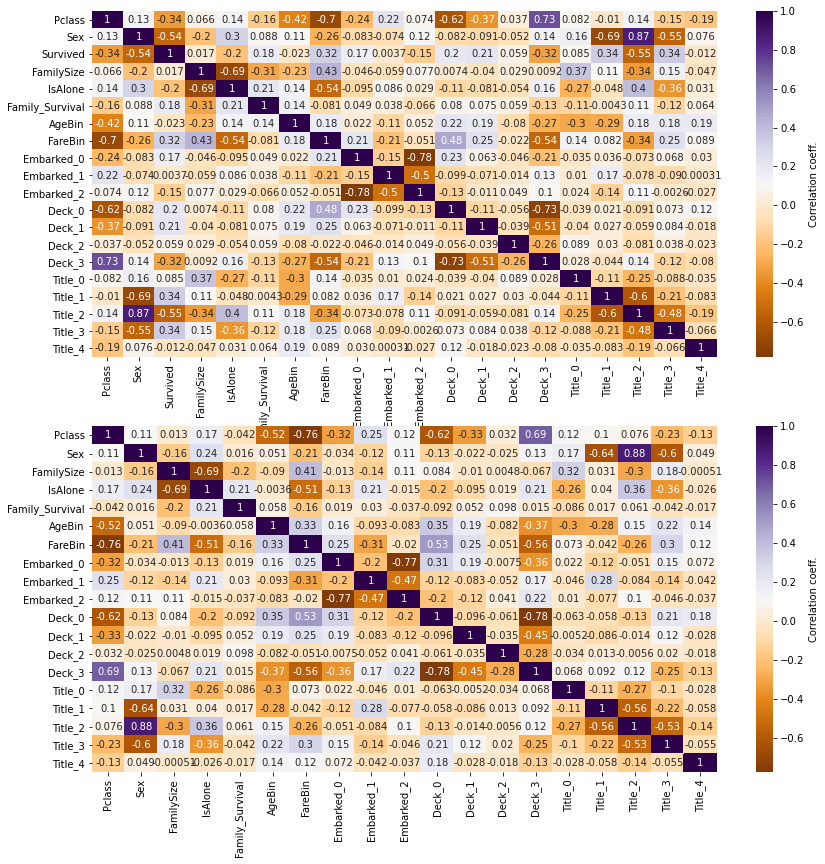

In [56]:
fig, axs=plt.subplots(2,1, figsize=(14,14))
sns.heatmap(train.corr(), ax=axs[0], annot=True, cbar_kws={'label': 'Correlation coeff.'}, cmap="PuOr")
sns.heatmap(test.corr(),  ax=axs[1], annot=True, cbar_kws={'label': 'Correlation coeff.'}, cmap="PuOr")

# **3. MODELLING**

Here i will only focus on **Logistic Regression** but of course you need to try others MLAs too, to see which one works the best.

1. Split the data: **train_test_split, cross validation**

In [57]:
#training data
X = train.drop(['Survived'], axis=1)
stdscale=StandardScaler()
X_scaled = stdscale.fit_transform(X)
y = train.Survived.copy()

In [58]:
#split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5) #%25 of the data used for test set

#fitting the model
model = LogisticRegression(max_iter = 500000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test) #test labels, true response values
print('The accuracy of the Logistic Regression is:',accuracy)

The accuracy of the Logistic Regression is: 0.8699551569506726


In [59]:
confusion_matrix(y_test,y_pred) #true response value, predicted response

array([[128,  12],
       [ 17,  66]])

In [60]:
# another way to find the model score: accuracy_score
# Accuracy: how often the model is correct. (TP + TN)/total

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8699551569506726

In [61]:
#precision, positive predictive value ppv: how often model correctly predicts positive outcome.= TP/(TP+FP)
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.8461538461538461

* Another way to split data: **Cross Validation**  
As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as model variance.    
To overcome this and get a generalized model,we use *Cross Validation.*  
* We can use **KFold**, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit for cross validation.

In [62]:
from sklearn.model_selection import KFold, StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation: CROSS VALIDATION
from sklearn.model_selection import cross_val_predict #prediction

#Kfold
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_result = cross_val_score(model, X_scaled, y, cv = kfold, scoring = "accuracy")
cv_result.mean() # mean accuracy of kfold

0.8451560549313358

**Stratification** is the process of rearranging the data as to ensure each fold is a good representative of the whole. For example in a binary classification problem where each class comprises 50% of the data, it is best to arrange the data such that in every fold, each class comprises around half the instances.

In [63]:
#Stratified Kfold
stkfold=StratifiedKFold(n_splits=10)
#you can use cross_val_score as well to find scores. this is just for variety.
accuracy=[]
for train_index, test_index in stkfold.split(X_scaled, y):
    x1_train, x1_test= X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test= y.iloc[train_index], y.iloc[test_index]
    model.fit(x1_train, y1_train)
    prediction=model.predict(x1_test)
    score=accuracy_score(prediction, y1_test)
    accuracy.append(score)

print(accuracy)

[0.8111111111111111, 0.8539325842696629, 0.7752808988764045, 0.898876404494382, 0.8651685393258427, 0.8202247191011236, 0.8202247191011236, 0.8426966292134831, 0.8539325842696629, 0.898876404494382]


In [64]:
# mean accuracy of stratified kfold
np.mean(accuracy)

0.8440324594257179

2. Evaluate the classification model: **Confusion Matrix**, **AUC and ROC curves**

Text(0.5, 15.0, 'Predicted Value')

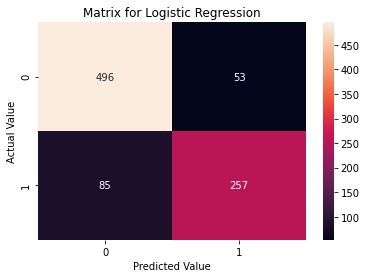

In [65]:
from sklearn.metrics import confusion_matrix #for confusion matrix

fig=plt.subplot()
ax=plt.gca()
y_pred = cross_val_predict(model,X_scaled,y,cv=kfold)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='2.0f')
ax.set_title('Matrix for Logistic Regression')
ax.set_ylabel('Actual Value')
ax.set_xlabel('Predicted Value')

number of correct predictions are 496(for dead) + 257(for survived) with the mean CV accuracy being (496+257)/891 = 84.51% which we did get earlier.

**Making submission:**

In [66]:
#fitting the model with scaled features
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X) #train features
y_train=y #train response
X_test = std_scaler.transform(test) #test features

model.fit(X_scaled, y_train)
y_pred=model.predict(X_test) #predicted test response


In [67]:
subm = pd.DataFrame(pd.read_csv("/kaggle/input/titanic/test.csv")['PassengerId'])
subm['Survived'] = y_pred
subm.Survived=subm.Survived.astype('int')
subm

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [68]:
subm.to_csv("/kaggle/working/submission.csv", index = False)